In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/Attrition_data.csv')
df.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,2,XYZ2490,ABC2,05-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,06-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager


In [ ]:
import pandas as pd



df['DOJ'] = pd.to_datetime(df['DOJ'], dayfirst=True, errors='coerce')
df['day1'] = df['DOJ'].dt.day
df['month1'] = df['DOJ'].dt.month_name()
df['year1'] = df['DOJ'].dt.year
df.drop('DOJ', axis=1, inplace=True)


In [ ]:
df['In Active Date'] = pd.to_datetime(df['In Active Date'], dayfirst=True, errors='coerce')
df['day2'] = df['In Active Date'].dt.day
df['month2'] = df['In Active Date'].dt.month_name()
df['year2'] = df['In Active Date'].dt.year
df.drop('In Active Date', axis=1, inplace=True)


In [ ]:
df['Remarks'].value_counts()

Remarks
Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Termination - Poor Performance                     13
Absconding                                          8
Termination - Theft                                 6
Health Reasons                                      4
Higher education                                    3
Reasons not known                                   2
Name: count, dtype: int64

In [ ]:
df.shape

(327, 23)

In [ ]:
value_counts = df['Remarks'].value_counts()

threshold = len(df) * 0.05

filtered_value_counts = value_counts[value_counts >= threshold]
df = df[df['Remarks'].isin(filtered_value_counts.index)]

In [ ]:
df.shape

(291, 23)

In [ ]:
df['Remarks'].value_counts()

Remarks
Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Name: count, dtype: int64

In [ ]:
df.isna().sum().sort_values(ascending=False)

Location                             2
S.No                                 0
Monthly Income                       0
month2                               0
day2                                 0
year1                                0
month1                               0
day1                                 0
Remarks                              0
Zone                                 0
Marital Status                       0
Engagement Score (% Satisfaction)    0
Last Rating                          0
EmpID                                0
Age                                  0
Education                            0
Gender                               0
Tenure                               0
Attrition                            0
Grade                                0
Designation                          0
Emp Name                             0
year2                                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 326
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   S.No                               291 non-null    int64 
 1   EmpID                              291 non-null    object
 2   Emp Name                           291 non-null    object
 3   Designation                        291 non-null    object
 4   Grade                              291 non-null    object
 5   Attrition                          291 non-null    object
 6   Location                           289 non-null    object
 7   Tenure                             291 non-null    object
 8   Gender                             291 non-null    object
 9   Education                          291 non-null    object
 10  Age                                291 non-null    int64 
 11  Last Rating                        291 non-null    int64 
 12  Monthly Incom

In [ ]:
df.drop(['S.No'], axis=1, inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


object_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)


for col in object_columns:
    df[col] = le.fit_transform(df[col])

df.isna().sum()

EmpID                                0
Emp Name                             0
Designation                          0
Grade                                0
Attrition                            0
Location                             0
Tenure                               0
Gender                               0
Education                            0
Age                                  0
Last Rating                          0
Monthly Income                       0
Engagement Score (% Satisfaction)    0
Marital Status                       0
Zone                                 0
Remarks                              0
day1                                 0
month1                               0
year1                                0
day2                                 0
month2                               0
year2                                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 326
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   EmpID                              291 non-null    int64
 1   Emp Name                           291 non-null    int64
 2   Designation                        291 non-null    int64
 3   Grade                              291 non-null    int64
 4   Attrition                          291 non-null    int64
 5   Location                           291 non-null    int64
 6   Tenure                             291 non-null    int64
 7   Gender                             291 non-null    int64
 8   Education                          291 non-null    int64
 9   Age                                291 non-null    int64
 10  Last Rating                        291 non-null    int64
 11  Monthly Income                     291 non-null    int64
 12  Engagement Score (% Satisfa

In [ ]:
# corr_matrix = df.corr()
# corr = np.array(corr_matrix)[15]
# cols= df.columns
# columns_to_drop = []

# for i in range(len(cols)):
#     print(cols[i], "-->", np.round(corr[i], 3))
#     if np.isnan(corr[i]) or np.abs(corr[i]) < 0.1:
#         columns_to_drop.append(cols[i])

# df.drop(columns_to_drop, axis=1, inplace=True)
# X = df.drop(columns=['Remarks']).values
# y= df['Remarks'].values


In [ ]:
df.columns

Index(['EmpID', 'Emp Name', 'Designation', 'Grade', 'Attrition ', 'Location',
       'Tenure', 'Gender', 'Education', 'Age', 'Last Rating', 'Monthly Income',
       'Engagement Score (% Satisfaction)', 'Marital Status', 'Zone',
       'Remarks', 'day1', 'month1', 'year1', 'day2', 'month2', 'year2'],
      dtype='object')

In [ ]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


df= remove_outliers_iqr(df)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# X = df.drop(columns=['Remarks']).values
# y= df['Remarks'].values

# sc=StandardScaler()
# X_scaled=sc.fit_transform(X)
# y_scaled=sc.fit_transform(y.reshape(-1,1))
# # X=X_scaled

In [ ]:
df.columns

Index(['EmpID', 'Emp Name', 'Designation', 'Grade', 'Attrition ', 'Location',
       'Tenure', 'Gender', 'Education', 'Age', 'Last Rating', 'Monthly Income',
       'Engagement Score (% Satisfaction)', 'Marital Status', 'Zone',
       'Remarks', 'day1', 'month1', 'year1', 'day2', 'month2', 'year2'],
      dtype='object')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Best k value based on Accuracy: 11
Metrics for Classification using K-Nearest Neighbors with best k:
Accuracy: 0.6494252873563219
Precision: 0.6549606371696464
Recall: 0.6494252873563219
F1-score: 0.5700662049168428


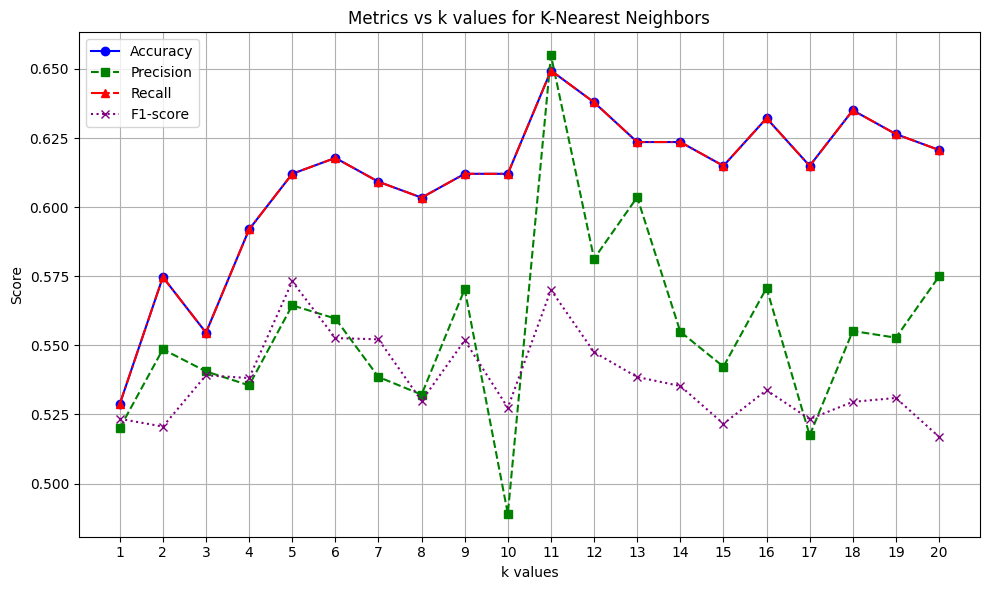

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

k_values = range(1, 21)  # Test k from 1 to 20

# Initialize lists to store average scores for each k
avg_accuracy_list = []
avg_precision_list = []
avg_recall_list = []
avg_f1_list = []

# Repeated Stratified K-Fold cross-validation
kf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=33)

for k in k_values:
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

        y_pred = knn_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    avg_accuracy_list.append(avg_accuracy)
    avg_precision_list.append(avg_precision)
    avg_recall_list.append(avg_recall)
    avg_f1_list.append(avg_f1)

# Find the best k based on accuracy
best_k = k_values[np.argmax(avg_accuracy_list)]
best_accuracy = max(avg_accuracy_list)
best_precision = avg_precision_list[np.argmax(avg_accuracy_list)]
best_recall = avg_recall_list[np.argmax(avg_accuracy_list)]
best_f1 = avg_f1_list[np.argmax(avg_accuracy_list)]

print("Best k value based on Accuracy:", best_k)
print("Metrics for Classification using K-Nearest Neighbors with best k:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1-score: {best_f1}")

# Optionally, plot the metrics vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_accuracy_list, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(k_values, avg_precision_list, marker='s', linestyle='--', color='g', label='Precision')
plt.plot(k_values, avg_recall_list, marker='^', linestyle='-.', color='r', label='Recall')
plt.plot(k_values, avg_f1_list, marker='x', linestyle=':', color='purple', label='F1-score')
plt.xlabel('k values')
plt.ylabel('Score')
plt.title('Metrics vs k values for K-Nearest Neighbors')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
